---
# 1. Importing libraries and Label Mapping
---
 Before we get started we will load in all the tools we will need. I have also decided to rename label mapping up top and all at once to make the code down below more eficient.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Global Label Mapping for Consistent Visualization
label_mapping = {
    'TechSupport_Yes': 'Subscribes to Tech Support',
    'Tenure_Group_Mid': 'Customer for 1 to 3 years',
    'ContractType_One-Year': 'Single Year Contract',
    'Tenure_Group_Long': 'Customer over 3 years',
    'ContractType_Two-Year': 'Two Year Contract',
    'OnlineSecurity_Yes': 'Subscribes to Online Security',
    'OnlineBackup_Yes': 'Subscribes to Online Backup',
    'DeviceProtection_Yes': 'Subscribes to Device Protection',
    'StreamingTV_Yes': 'Subscribes to Streaming TV',
    'StreamingMovies_Yes': 'Subscribes to Streaming Movies',
    'InternetService_DSL': 'DSL Internet Service',
    'Gender_Male': 'Male Customer',
    'Gender_Female': 'Female Customer',
    'Partner_Yes': 'Has a Partner',
    'Dependents_Yes': 'Has Dependents',
    'PhoneService_Yes': 'Subscribes to Phone Service',
    'MultipleLines_Yes': 'Has Multiple Lines',
    'PaperlessBilling_No': 'No Paperless Billing',
    'Age_Group_Under 25': 'Age Group: Under 25 years',
    'Age_Group_25-39': 'Age Group: 25-39 years',
    'Age_Group_40-54': 'Age Group: 40-54 years',
    'Age_Group_55-69': 'Age Group: 55-69 years',
    'Age_Group_70-84': 'Age Group: 70-84 years',
    'Age_Group_85+': 'Age Group: 85+ years',
    'MonthlyCharges': 'Monthly Charges',
    'Tenure_x_MonthToMonth_Contract': 'Months on Month-to-Month Contract',
    'ContractType_Month-to-Month': 'Month-to-Month Contract',
    'InternetService_Fiber Optic': 'Fiber Optic Internet',
    'PaperlessBilling_Yes': 'Paperless Billing',
    'OnlineSecurity_No': 'No Online Security',
    'OnlineBackup_No': 'No Online Backup',
    'DeviceProtection_No': 'No Device Protection',
    'TechSupport_No': 'No Tech Support',
    'StreamingTV_No': 'No Streaming TV',
    'StreamingMovies_No': 'No Streaming Movies',
    'MultipleLines_No': 'No Multiple Lines',
    'MultipleLines_No_phone_service': 'No Multiple Lines (No Phone Service)',
    'PaymentMethod_Electronic check': 'Electronic Check Payment',
    'Tenure_Group_New': 'Customer for under 1 year',
    'InternetService_None': 'No Internet Service'
}
print("Project setup complete. Libraries loaded and global label mapping defined.")

Project setup complete. Libraries loaded and global label mapping defined.


---
# 2. Data Loading and Initial Preparation
---
 Our first core task is to load the customer dataset and perform essential initial cleaning.
 This ensures the data is in a suitable format for subsequent processing and analysis.

In [5]:
try:
    df = pd.read_csv('customer_churn_data.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'customer_churn_data.csv' not found. Please ensure the file is in the same directory.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during dataset loading: {e}")
    exit()

# We standardize column names by replacing spaces with underscores for easier access.
df.columns = df.columns.str.replace(' ', '_')

# Missing 'InternetService' values are imputed with 'None'. This reflects that absence of an
# internet service entry likely means the customer does not have internet service from us.
df['InternetService'] = df['InternetService'].fillna('None')

# To avoid multicollinearity and simplify model interpretation, the 'TotalCharges' column is dropped.
# Its information is largely captured by 'Tenure' and 'MonthlyCharges'.
if 'TotalCharges' in df.columns:
    df = df.drop('TotalCharges', axis=1)
    print("'TotalCharges' column dropped to improve model interpretation.")

# The 'Churn' column, our target variable, is converted to a numerical format (0 for 'No', 1 for 'Yes')
# for compatibility with our machine learning model.
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# The 'CustomerID' column is a unique identifier and holds no predictive power, so we remove it.
df_processed = df.drop('CustomerID', axis=1)

print("Initial data preparation complete. The dataset is now clean and ready for feature engineering.")

Dataset loaded successfully.
'TotalCharges' column dropped to improve model interpretation.
Initial data preparation complete. The dataset is now clean and ready for feature engineering.


---
# 3. Feature Engineering
---
 In this phase, we'll create new, more insightful features from our existing data.
 This helps our model better understand complex customer behaviors and improves its predictive power.

In [6]:
# We categorize 'Tenure' into meaningful groups ('New', 'Mid', 'Long').
# This allows us to analyze churn behavior across different stages of a customer's relationship with the company.
if 'Tenure' in df_processed.columns:
    bins = [0, 12, 36, np.inf]
    labels = ['New', 'Mid', 'Long']
    df_processed['Tenure_Group'] = pd.cut(df_processed['Tenure'], bins=bins, labels=labels, right=True, include_lowest=True)
    print("Engineered 'Tenure_Group' categorical column.")

# We create a 'Services_Count' feature to quantify the number of core services (internet and tech support)
# a customer subscribes to, providing a simple measure of their engagement level.
df_processed['Services_Count'] = (df_processed['InternetService'] != 'None').astype(int) + \
                                 (df_processed['TechSupport'] == 'Yes').astype(int)
print("Engineered 'Services_Count'.")

# Age is binned into distinct groups ('Under 25', '25-39', etc.). This approach
# helps to capture age-related trends in churn without relying on a linear relationship.
if 'Age' in df_processed.columns:
    age_bins = [0, 25, 40, 55, 70, 85, np.inf]
    age_labels = ['Under 25', '25-39', '40-54', '55-69', '70-84', '85+']
    df_processed['Age_Group'] = pd.cut(df_processed['Age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)
    df_processed = df_processed.drop('Age', axis=1) # The original 'Age' column is no longer needed.
    print("Engineered 'Age_Group' column and dropped original 'Age'.")

print("Feature engineering complete. We've enhanced our dataset with more meaningful variables.")


Engineered 'Tenure_Group' categorical column.
Engineered 'Services_Count'.
Engineered 'Age_Group' column and dropped original 'Age'.
Feature engineering complete. We've enhanced our dataset with more meaningful variables.


---
# 4. One-Hot Encoding and Interaction Feature Creation
---
 This section focuses on transforming categorical data into a numerical format suitable for our model.
 We'll also create a crucial interaction feature to capture nuanced relationships between variables.

In [7]:
# Categorical features are converted into a numerical format using one-hot encoding.
# We retain all categories (drop_first=False) to ensure consistent and interpretable coefficients
# in our Logistic Regression model, allowing each category to be evaluated against a theoretical baseline.
categorical_cols_for_ohe = df_processed.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Churn' in categorical_cols_for_ohe:
    categorical_cols_for_ohe.remove('Churn')

df_encoded = pd.get_dummies(df_processed, columns=categorical_cols_for_ohe, drop_first=False, dtype=int)
print(f"One-Hot Encoded columns: {categorical_cols_for_ohe}")

# An interaction term, 'Tenure_x_MonthToMonth_Contract', is created.
# This allows our model to capture how the impact of customer tenure specifically changes
# for those on a flexible month-to-month contract, uncovering a more complex relationship.
if 'Tenure' in df_encoded.columns and 'ContractType_Month-to-Month' in df_encoded.columns:
    df_encoded['Tenure_x_MonthToMonth_Contract'] = df_encoded['Tenure'] * df_encoded['ContractType_Month-to-Month']
    print("Engineered 'Tenure_x_MonthToMonth_Contract' interaction feature.")
else:
    print("Warning: Missing columns for 'Tenure_x_MonthToMonth_Contract' interaction. This feature will not be created.")
    df_encoded['Tenure_x_MonthToMonth_Contract'] = 0 # Placeholder if columns are missing

print("\n--- Snapshot of the data after all feature engineering and encoding ---")
print(df_encoded.head())
print(f"\nFinal DataFrame shape: {df_encoded.shape}. The data is now fully prepared for modeling.")

One-Hot Encoded columns: ['Gender', 'ContractType', 'InternetService', 'TechSupport', 'Tenure_Group', 'Age_Group']
Engineered 'Tenure_x_MonthToMonth_Contract' interaction feature.

--- Snapshot of the data after all feature engineering and encoding ---
   Tenure  MonthlyCharges  Churn  Services_Count  Gender_Female  Gender_Male  \
0       4           88.35      1               2              0            1   
1       0           36.67      1               2              0            1   
2       2           63.79      1               1              1            0   
3       8          102.34      1               2              1            0   
4      32           69.01      1               0              0            1   

   ContractType_Month-to-Month  ContractType_One-Year  ContractType_Two-Year  \
0                            1                      0                      0   
1                            1                      0                      0   
2                         

---
# 5. Data Scaling and Splitting
---
 With our features prepared, we'll now scale numerical data and split the dataset.
 Scaling prevents features with larger values from dominating the model, and splitting ensures
 we can objectively evaluate our model's performance on unseen data.

In [8]:
# We separate our features (X) from the target variable (y), 'Churn'.
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Numerical features are scaled using StandardScaler. This standardizes their range,
# which is important for models like Logistic Regression to perform optimally.
numerical_cols_to_scale = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
X_scaled_part = scaler.fit_transform(X[numerical_cols_to_scale])
X_scaled_part = pd.DataFrame(X_scaled_part, columns=numerical_cols_to_scale, index=X.index)

# The scaled numerical features then replace the original ones in our feature set.
X_final = X.copy()
X_final[numerical_cols_to_scale] = X_scaled_part
print("Numerical features scaled.")

# Finally, we split the data into training and testing sets (80% train, 20% test).
# This allows us to train our model on one portion of the data and validate its performance
# on a completely separate, unseen portion.
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.20, random_state=42)
print(f"Data split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples) sets.")

Numerical features scaled.
Data split into training (800 samples) and testing (200 samples) sets.


---
# 6. Model Training and Evaluation
---
 This section focuses on building our predictive model and rigorously assessing its performance.
 Our goal is to develop a model that accurately predicts customer churn.

In [10]:
# We train a Logistic Regression model. This model was chosen for its strong interpretability,
# allowing us to clearly understand which factors contribute to churn.
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully!")

# --- Model Evaluation ---
# We assess the model's performance on the test set using key metrics.
# Accuracy, Confusion Matrix, and Classification Report provide a comprehensive view
# of how well our model predicts churn and non-churn.
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\n### Model Performance Overview\nOverall Accuracy: {accuracy:.4f}")
print("\n--- Confusion Matrix ---")
print(conf_matrix)
print("\n--- Classification Report ---")
print(class_report)

Logistic Regression model trained successfully!

### Model Performance Overview
Overall Accuracy: 0.9850

--- Confusion Matrix ---
[[ 23   0]
 [  3 174]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        23
           1       1.00      0.98      0.99       177

    accuracy                           0.98       200
   macro avg       0.94      0.99      0.97       200
weighted avg       0.99      0.98      0.99       200



---
# 7. Feature Importance Analysis and Visualization
---
 Understanding which features drive churn is critical for actionable insights.
 Here, we'll extract the model's coefficients and visualize their impact to inform business strategy.

In [11]:
# We extract the model's coefficients. For Logistic Regression, these coefficients indicate the
# strength and direction of each feature's influence on the likelihood of churn.
coefficients = model.coef_[0]
feature_names = X_train.columns
# We sort features by the absolute value of their coefficients to see the most impactful ones first.
sorted_feature_importance = pd.Series(coefficients, index=feature_names).reindex(
    pd.Series(coefficients, index=feature_names).abs().sort_values(ascending=False).index
)

print("\n--- Top 10 Most Impactful Features (Sorted by Absolute Coefficient Value) ---\n",
      sorted_feature_importance.head(10))

print("\nAll feature coefficients are available in 'sorted_feature_importance' for deeper inspection.")

# --- Visualizing Model Insights ---
# We'll now present key insights through a series of focused visualizations to make our findings easily digestible.



--- Top 10 Most Impactful Features (Sorted by Absolute Coefficient Value) ---
 Tenure_x_MonthToMonth_Contract    1.354967
Tenure_Group_New                  1.147372
MonthlyCharges                    1.146333
TechSupport_Yes                  -1.126636
TechSupport_No                    1.126636
ContractType_Month-to-Month       0.969453
Tenure_Group_Mid                 -0.835912
ContractType_One-Year            -0.669388
Services_Count                   -0.620438
Tenure                           -0.585671
dtype: float64

All feature coefficients are available in 'sorted_feature_importance' for deeper inspection.


---
# 7.1 Confusion Matrix Visualization
---
 This visualization provides a clear and intuitive picture of our model's classification performance.
 It helps us understand how many customers were correctly identified as churning or not churning.


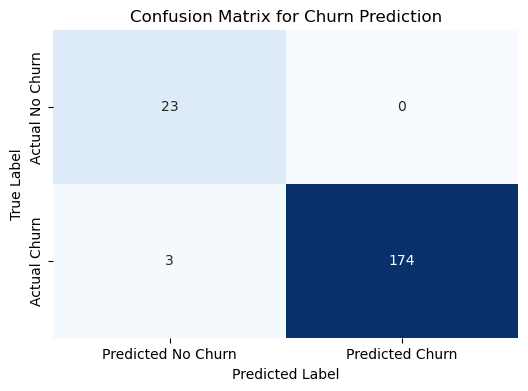


**Interpreting the Confusion Matrix:**
  - **True Negatives (Top-Left):** Represents customers correctly predicted as **not churning**.
  - **False Positives (Top-Right):** Represents customers incorrectly predicted as churning (**false alarms**).
  - **False Negatives (Bottom-Left):** Represents churning customers our model **failed to identify** (missed opportunities for intervention).
  - **True Positives (Bottom-Right):** Represents churning customers our model **correctly identified**.
This matrix indicates our model is highly effective, with very few missed churners and no false alarms, which is excellent for targeted retention efforts.



In [12]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Churn Prediction')
plt.show()

print("""
**Interpreting the Confusion Matrix:**
  - **True Negatives (Top-Left):** Represents customers correctly predicted as **not churning**.
  - **False Positives (Top-Right):** Represents customers incorrectly predicted as churning (**false alarms**).
  - **False Negatives (Bottom-Left):** Represents churning customers our model **failed to identify** (missed opportunities for intervention).
  - **True Positives (Bottom-Right):** Represents churning customers our model **correctly identified**.
This matrix indicates our model is highly effective, with very few missed churners and no false alarms, which is excellent for targeted retention efforts.
""")

---
# 7.2 Features Driving Customer Retention
---
 This chart highlights the factors that significantly contribute to customer loyalty and retention.
 These are the areas where the company is performing well in keeping its customers.

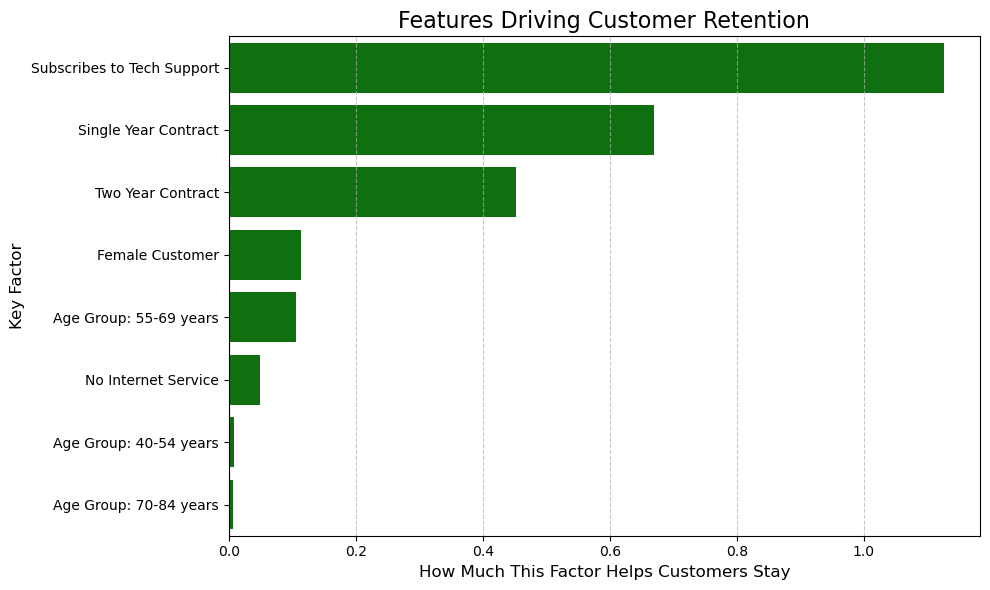


**Interpreting Customer Retention Factors:**
  - Each green bar represents a factor that makes a customer more likely to **stay** with our service.
  - The **longer** a green bar, the **more powerfully** that factor contributes to customer retention.
  - These insights are invaluable for understanding what makes customers loyal and for strengthening existing positive aspects of the service.



In [13]:
# We filter for features with negative coefficients, as these indicate a decreased likelihood of churn (i.e., increased retention).
# We exclude continuous 'Tenure' and 'Services_Count' to focus on specific categorical impacts.
all_negative_coeffs = sorted_feature_importance[
    (sorted_feature_importance < 0) &
    (~sorted_feature_importance.index.str.contains('Tenure|Services_Count|Services_Group', na=False))
]

# We sort these features by their absolute impact and prepare them for plotting.
plot_features_green = all_negative_coeffs.abs().sort_values(ascending=False).index
plot_values_green = [sorted_feature_importance[feature] * -1 for feature in plot_features_green] # Convert to positive for bar length
display_labels_green = [label_mapping.get(feature_name, feature_name) for feature_name in plot_features_green]

plt.figure(figsize=(10, max(6, len(display_labels_green) * 0.5)))
sns.barplot(x=plot_values_green, y=display_labels_green, color='green')

plt.title('Features Driving Customer Retention', fontsize=16)
plt.xlabel('How Much This Factor Helps Customers Stay', fontsize=12)
plt.ylabel('Key Factor', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("""
**Interpreting Customer Retention Factors:**
  - Each green bar represents a factor that makes a customer more likely to **stay** with our service.
  - The **longer** a green bar, the **more powerfully** that factor contributes to customer retention.
  - These insights are invaluable for understanding what makes customers loyal and for strengthening existing positive aspects of the service.
""")

---
# 7.3 Features Driving Customer Churn
---
 This chart identifies the key factors that significantly increase the likelihood of customer churn.
 Understanding these drivers is crucial for pinpointing pain points and developing preventative measures.

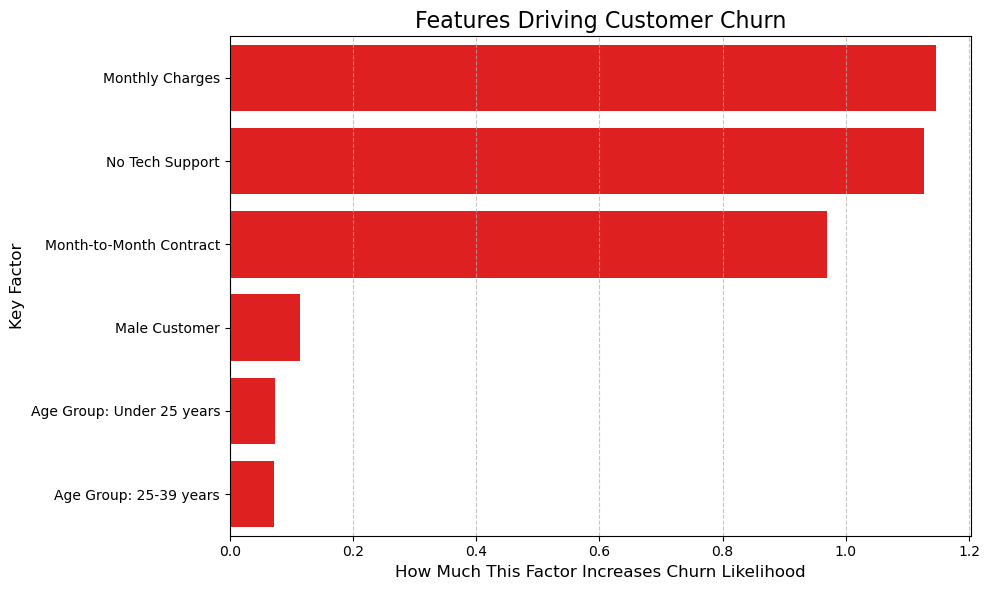


**Interpreting Customer Churn Factors:**
  - Each red bar represents a factor that makes a customer more likely to **churn** from our service.
  - The **longer** a red bar, the **more powerfully** that factor pushes customers towards churning.
  - These insights are crucial for identifying pain points and developing targeted strategies to prevent customer attrition.



In [15]:
# We filter for features with positive coefficients, as these indicate an increased likelihood of churn.
# We exclude 'Tenure' and 'Services_Count' and specific internet service types (as they have their own dedicated plot).
all_positive_coeffs = sorted_feature_importance[
    (sorted_feature_importance > 0) &
    (~sorted_feature_importance.index.str.contains('Tenure|Services_Count|Services_Group', na=False))
]

all_positive_coeffs_sorted = all_positive_coeffs.abs().sort_values(ascending=False).index

# Exclude specific features from this general churn graph to keep focus or because they have dedicated visualizations.
features_to_exclude_from_red_graph = [
    'Tenure_x_MonthToMonth_Contract',
    'InternetService_Fiber Optic',
    'InternetService_DSL',
    'InternetService_None'
]

plot_features_red = [
    feature for feature in all_positive_coeffs_sorted
    if feature not in features_to_exclude_from_red_graph
]

plot_values_red = [sorted_feature_importance[feature] for feature in plot_features_red]
display_labels_red = [label_mapping.get(feature_name, feature_name) for feature_name in plot_features_red]

plt.figure(figsize=(10, max(6, len(display_labels_red) * 0.5)))
sns.barplot(x=plot_values_red, y=display_labels_red, color='red')

plt.title('Features Driving Customer Churn', fontsize=16)
plt.xlabel('How Much This Factor Increases Churn Likelihood', fontsize=12)
plt.ylabel('Key Factor', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("""
**Interpreting Customer Churn Factors:**
  - Each red bar represents a factor that makes a customer more likely to **churn** from our service.
  - The **longer** a red bar, the **more powerfully** that factor pushes customers towards churning.
  - These insights are crucial for identifying pain points and developing targeted strategies to prevent customer attrition.
""")

---
# 7.4 Focused Insight: Impact of Internet Service on Churn
---
 We've created a dedicated visualization to specifically examine the influence of different internet service types on churn.
 This deeper dive can reveal surprising trends not obvious in the broader analysis.

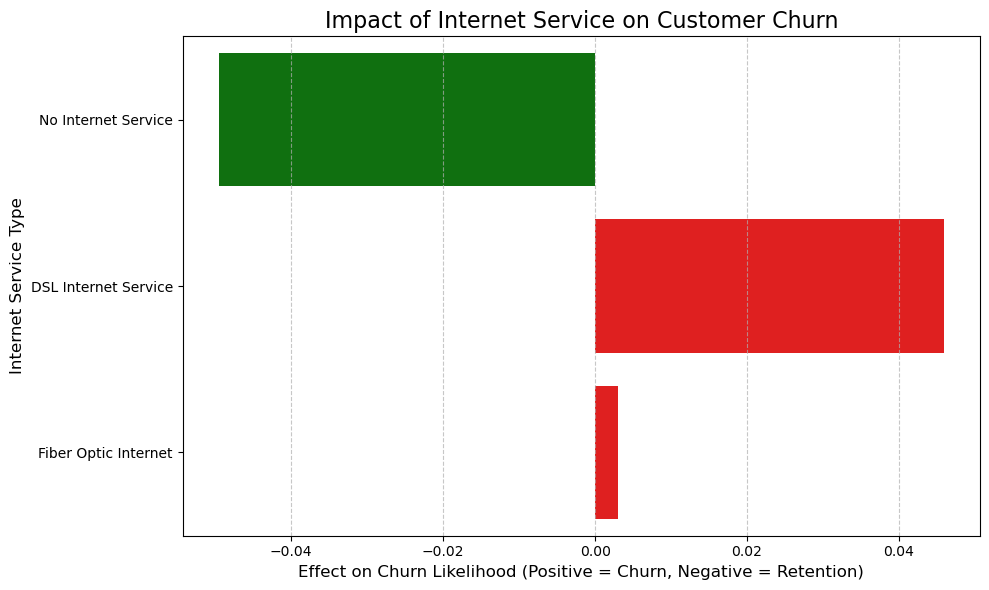


**Insights from Internet Service Impact:**
  - This graph directly illustrates how each internet service type affects churn likelihood.
  - **Red bars** indicate increased churn risk, while **green bars** indicate reduced churn risk.
  - A key takeaway here is that customers *without* our internet service tend to stay, while those *with* any internet service (Fiber Optic being more impactful than DSL) show a slightly increased churn risk. This counter-intuitive finding warrants further investigation into competitor offerings or the perceived value/reliability of our internet services, as it suggests an area of potential vulnerability.



In [17]:
internet_features_to_plot = [
    'InternetService_Fiber Optic',
    'InternetService_DSL',
    'InternetService_None'
]

# We select and sort the internet service features by their absolute impact.
plot_data_internet = sorted_feature_importance[
    internet_features_to_plot
].sort_values(key=abs, ascending=False)

features_internet = [label_mapping.get(f, f) for f in plot_data_internet.index]
values_internet = plot_data_internet.values
colors_internet = ['red' if v > 0 else 'green' for v in values_internet]

plt.figure(figsize=(10, 6))
sns.barplot(x=values_internet, y=features_internet, hue=features_internet, palette=colors_internet, legend=False)

plt.title('Impact of Internet Service on Customer Churn', fontsize=16)
plt.xlabel('Effect on Churn Likelihood (Positive = Churn, Negative = Retention)', fontsize=12)
plt.ylabel('Internet Service Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("""
**Insights from Internet Service Impact:**
  - This graph directly illustrates how each internet service type affects churn likelihood.
  - **Red bars** indicate increased churn risk, while **green bars** indicate reduced churn risk.
  - A key takeaway here is that customers *without* our internet service tend to stay, while those *with* any internet service (Fiber Optic being more impactful than DSL) show a slightly increased churn risk. This counter-intuitive finding warrants further investigation into competitor offerings or the perceived value/reliability of our internet services, as it suggests an area of potential vulnerability.
""")